---
# Crash Course Python for Data Science — Predictive Modelling
---
# 01 - Regression modelling
---
## STOP! BEFORE GOING ANY FURTHER...  

Remember, this exercises are open book, open neighbour, open everything! Try to do them on your own before looking at the solution samples.

---
<br>

### 1. Experiment with Nearest Neighbor parameter

Using the following code to load the same 10 training and test data points from the workshop.

In [1]:
# Run this first!

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# plot tunning
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

columns = ['carat', 'cut', 'price']

features = ['carat', 'cut']
target = 'price'

train = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 422],
        [0.31, 'Ideal', 489],
        [0.42, 'Premium', 737],
        [0.5, 'Ideal', 1415],
        [0.51, 'Premium', 1177],
        [0.7, 'Fair', 1865],
        [0.73, 'Fair', 2351],
        [1.01, 'Good', 3768],
        [1.18, 'Very Good', 3965],
        [1.18, 'Ideal', 4838]])

test  = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 432],
        [0.34, 'Ideal', 687],
        [0.37, 'Premium', 1124],
        [0.4, 'Good', 720],
        [0.51, 'Ideal', 1397],
        [0.51, 'Very Good', 1284],
        [0.59, 'Ideal', 1437],
        [0.7, 'Ideal', 3419],
        [0.9, 'Premium', 3484],
        [0.9, 'Fair', 2964]])

cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)

Then, train a `KNeighborsRegressor` model with `n_neighbors=1`.

Use both `carat` and `cut` features.

Calculate the mean absolute error on the training data and on the test data.

In [6]:
# Step 1. Create instance of the model 
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1)

### YOUR CODE GOES HERE ###

# Step 2. Train the algorithm
model.fit(train[features], train[target])

### YOUR CODE GOES HERE ###

# Step 3. Make predictions
model.predict([[0.7,1]])
### YOUR CODE GOES HERE ###

# Step 4. Evaluate the model 
def error():
    # Calculate mean absolute error on the training data
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)

    # Calculate mean absolute error on the test data
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)

    # Display the errors
    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error))
    
error()
### YOUR CODE GOES HERE ###


Train Error: $ 0
Test Error: $ 1129


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


How does the train error and test error compare to the previous `KNeighborsRegressor` model from the lesson? (The previous model used `n_neighbors=2` and only the `carat` feature.)

Is this new model overfitting or underfitting? Why do you think this is happening here? 



### 2. More data, two features, linear regression

Use the following code to load data for diamonds under $5,000, and split the data into train and test sets. The training data has almost 30,000 rows, and the test data has almost 10,000 rows.

In [14]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = sns.load_dataset('diamonds')
df = df[df.price < 5000]
train, test = train_test_split(df.copy(), random_state=0)
train.shape, test.shape

((29409, 10), (9804, 10))

In [8]:
# Run this to check the dataset loaded and looks ok
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# Run this to encode the ordinal features as numbers
cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
target = test.cut = test.cut.map(cut_ranks)

Then, train a Linear Regression model with the `carat` and `cut` features. Calculate the mean absolute error on the training data and on the test data.

Use this model to predict the price of a half carat diamond with "very good" cut

In [12]:
### YOUR CODE GOES HERE ###
model_2 = LinearRegression()
feature_2 = ['carat','cut']
target_2 = ['price']

model_2.fit(train[feature_2],train[target_2])
model.predict([[0.5,3]])

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3965.])

### 3. More data, more features, any model

You choose what features and model type to use! Try to get a better mean absolute error on the test set than your model from the last question.

Refer to [this documentation](https://ggplot2.tidyverse.org/reference/diamonds.html) for more explanation of the features.

Besides `cut`, there are two more ordinal features, which you'd need to encode as numbers if you want to use in your model: `color` and `clarity`.

In [13]:
# Run this to see the description of color and clarity features
train.describe(include=['object'])

ValueError: No objects to concatenate

### Below I've written an example solution using K'Nearest, Linear Regression and a regression algorithm we didn't cover in the crash course, known as XGBoost. I strongly encourage you to come up with **your own** solution before looking at mine!

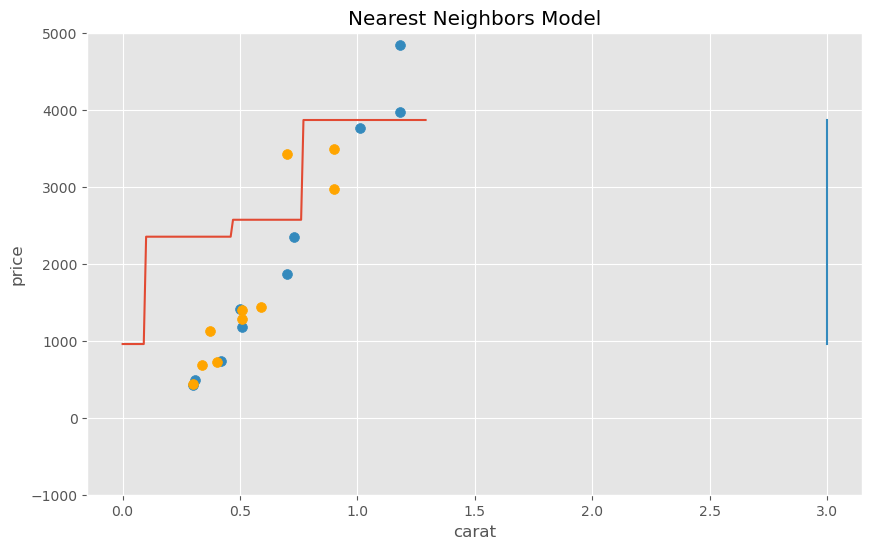

Train Error: $ 336
Test Error: $ 1059 



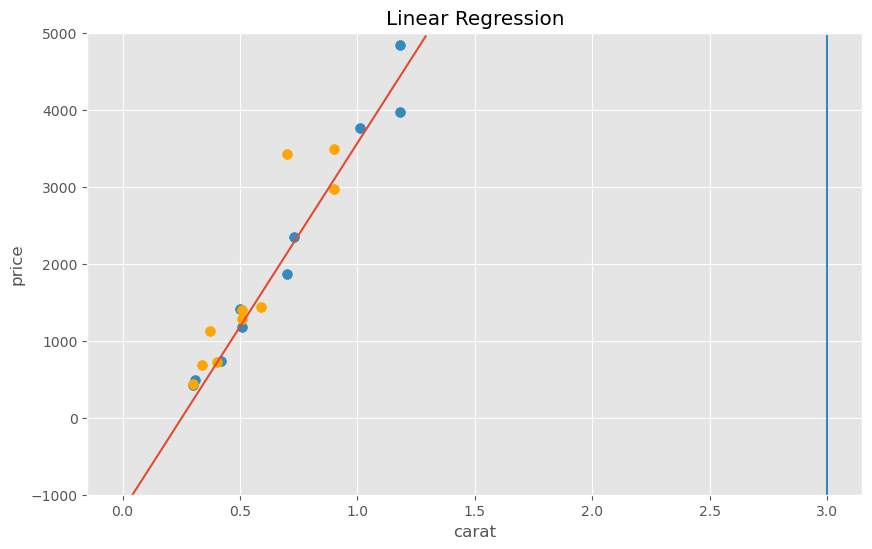

Train Error: $ 171
Test Error: $ 257 



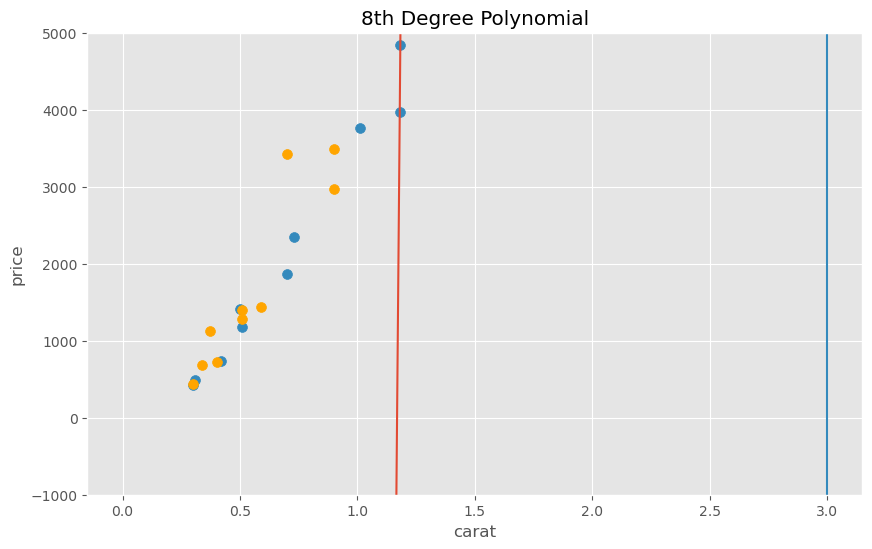

Train Error: $ 0
Test Error: $ 14291 



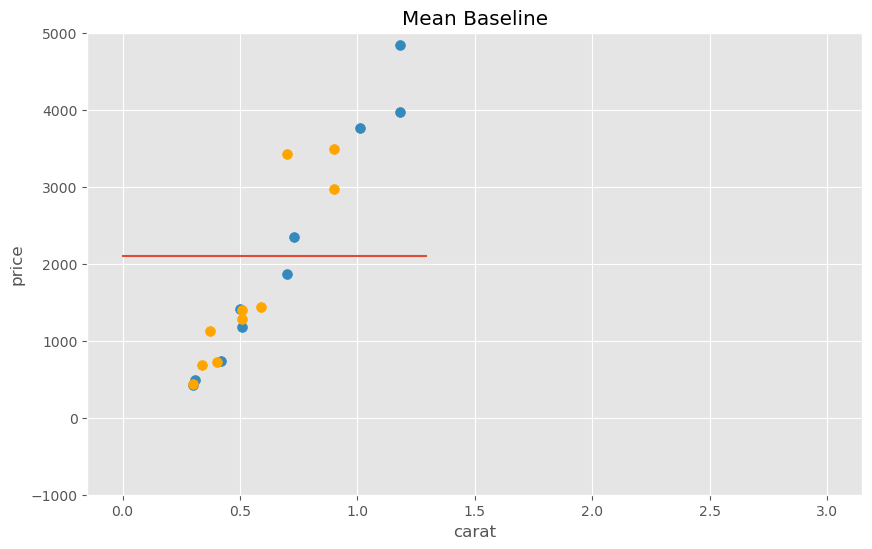

Train Error: $ 1302
Test Error: $ 1120 



In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

columns = ['carat', 'cut', 'price']

features = ['carat', 'cut']
target = 'price'

train = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 422],
        [0.31, 'Ideal', 489],
        [0.42, 'Premium', 737],
        [0.5, 'Ideal', 1415],
        [0.51, 'Premium', 1177],
        [0.7, 'Fair', 1865],
        [0.73, 'Fair', 2351],
        [1.01, 'Good', 3768],
        [1.18, 'Very Good', 3965],
        [1.18, 'Ideal', 4838]])

test  = pd.DataFrame(columns=columns, 
        data=[[0.3, 'Ideal', 432],
        [0.34, 'Ideal', 687],
        [0.37, 'Premium', 1124],
        [0.4, 'Good', 720],
        [0.51, 'Ideal', 1397],
        [0.51, 'Very Good', 1284],
        [0.59, 'Ideal', 1437],
        [0.7, 'Ideal', 3419],
        [0.9, 'Premium', 3484],
        [0.9, 'Fair', 2964]])

cut_ranks = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
train.cut = train.cut.map(cut_ranks)
test.cut = test.cut.map(cut_ranks)
carat_values = [c/100 for c in range(130)]

models = [('Nearest Neighbors Model', KNeighborsRegressor(n_neighbors=2)),
          ('Linear Regression', LinearRegression()),
          ('8th Degree Polynomial', make_pipeline(PolynomialFeatures(degree=8), LinearRegression())),
          ('Mean Baseline', DummyRegressor(strategy='mean'))]

X_plot = pd.DataFrame({
    'carat': carat_values,
    'cut': [3]*len(carat_values)   # fix 'cut' rank at 3
})

for name, model in models:
    
    ax = train.plot.scatter(x='carat', y='price', s=50)
    
    test.plot.scatter(x='carat', y='price', s=50, color='orange', ax=ax)
    
    model.fit(train[features], train[target])
    
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot)
    
    plt.title(name)
    plt.ylim((-1000, 5000))
    plt.show()
    
    y_true = train[target]
    y_pred = model.predict(train[features])
    train_error = mean_absolute_error(y_true, y_pred)
    
    y_true = test[target]
    y_pred = model.predict(test[features])
    test_error = mean_absolute_error(y_true, y_pred)
    

    print('Train Error: $', round(train_error))
    print('Test Error: $', round(test_error), '\n')
